(1) Create a sequence of integers starting from 12 and ending at 17.

In [1]:
12:17




[1] 12 13 14 15 16 17

(2) Create a vector of length 10 starting from $\pi$ and ending at $2\pi$ with evenly spaced intervals between numbers.

In [2]:
seq(pi, 2*pi, length.out = 10)




 [1] 3.141593 3.490659 3.839724 4.188790 4.537856 4.886922 5.235988 5.585054
 [9] 5.934119 6.283185

(3) Find the sum of all numbers between 1 and 1000 that are divisible by 3.

In [3]:
ns <- 1:1000
idx <- ns %% 3 == 0
sum(ns[idx])




[1] 166833

(4) Find the sum of the square numbers (e.g. 1, 4, 9, 16, ...) from 1 that are less than or equal to 10,000.

In [4]:
top <- sqrt(10000)
ns <- 1:top
sum(ns^2)




[1] 338350

(5) Loop through the numbers from 1 to 20. If the number is divisible by 3, print "Fizz". If the number is divisible by 5, print "Buzz". If it is divisible by both 3 and 5 print "FizzBuzz". Otherwise just print the number. Your output should look something like
```
1
2
Fizz
4
Buzz
...
```

In [5]:
for (i in 1:20) {
    if (i %% 15 == 0)
        print("FizzBuzz")
    else if (i %% 3 == 0)
        print("Fizz")
    else if (i %% 5 == 0)
        print("Buzz")
    else print(i)
}




[1] 1
[1] 2
[1] "Fizz"
[1] 4
[1] "Buzz"
[1] "Fizz"
[1] 7
[1] 8
[1] "Fizz"
[1] "Buzz"
[1] 11
[1] "Fizz"
[1] 13
[1] 14
[1] "FizzBuzz"
[1] 16
[1] 17
[1] "Fizz"
[1] 19
[1] "Buzz"


(6) Generate 1000 numbers from the standard normal distirbution. How many of these numbers are greater than 0?

In [6]:
xs <- rnorm(1000)
sum(xs > 0)




[1] 503

(7) Start by copying and pasting the code below in a Code cell
```R
set.seed(123)
n <- 10
case <- rnorm(n, 0, 1)
ctrl <- rnorm(n, 0.1, 1)
```

Run the above code, then state the null hypothesis for comparing the mean between cases and controls. Perform a t-test with $n = 10$ and $n = $1000$.

In [7]:
set.seed(123)
n <- 10
case <- rnorm(n, 0, 1)
ctrl <- rnorm(n, 0.1, 1)

t.test(case, ctrl)




	Welch Two Sample t-test

data:  case and ctrl
t = -0.5249, df = 17.872, p-value = 0.6061
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1710488  0.7030562
sample estimates:
 mean of x  mean of y 
0.07462564 0.30862196 


In [8]:
set.seed(123)
n <- 1000
case <- rnorm(n, 0, 1)
ctrl <- rnorm(n, 0.1, 1)

t.test(case, ctrl)


	Welch Two Sample t-test

data:  case and ctrl
t = -2.8229, df = 1997.355, p-value = 0.004806
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2141064 -0.0385684
sample estimates:
 mean of x  mean of y 
0.01612787 0.14246525 


(8) You are plannning an experiment to test the effect of a new drug on mouse growth as measured in grams. You plan to give the drug to a treatment group and not to an otherwise identical control group. You consider differences to be meaningful if the mean weights differ by at least 10 grams. From previous experiments, you know that the standard deviation between mice weights is 20 grams. What sample size do you need in each group for 80%, 90% and 100% power (use p=0.05)? If you recorded weights in kilograms instead, would the sample sizes need to change?

In [11]:
library(pwr)
pwr.t.test(d = 10/20, sig.level = 0.05, power = 0.8, type = "two.sample")





     Two-sample t test power calculation 

              n = 63.76561
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


(9) Make a plot of sample size (y-axis) against power (x-axis) for powers ranging from 0.01 to 0.99 in steps of 0.01 with an effect size of 0.1. Add in curves of different colors for effect sizes of 0.5 and 1.0. Add a legend for each curve.

In [14]:
ans <- pwr.t.test(d = 10/20, sig.level = 0.05, power = 0.8, type = "two.sample")
ans$n

[1] 63.76561

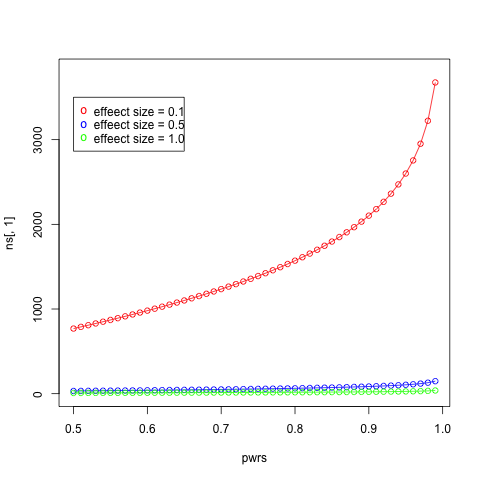

In [41]:
pwrs <- seq(0.5, 0.99, by=0.01)
ds <- c(0.1, 0.5, 1.0)
nrow <- length(pwrs)
ncol <- length(ds)
ns <- matrix(, nrow=nrow, ncol=ncol)
for (i in 1:nrow) {
    for (j in 1:ncol) {
        ns[i, j] <- pwr.t.test(d = ds[j], sig.level = 0.05, power = pwrs[i], type = "two.sample")$n
    }
}
plot(pwrs, ns[,1], type='o', col="red", ylim = c(0, 3800))
lines(pwrs, ns[,2], type='o', col="blue")
lines(pwrs, ns[,3], type='o', col="green")
legend(0.5, 3500, paste("effeect size =", c("0.1", "0.5", "1.0")), col=c("red", "blue", "green"), pch="o")

In [43]:
0.5^4

[1] 0.0625

In [45]:
expts <- rbinom(10000, size=4, prob=0.5)
sum(expts == 4)

[1] 613

(11) The `anscombe` dataframe has 8 columns and 11 rows. Perform a linear regression of $y1$ against $x1$, $y2$ against $x2$ and so on and report what the intercept and slope are in each case (Note: the anscombe dataframe is already loaded).

In [47]:
model <- lm(y1 ~ x1, data=anscombe)
model$coefficients

(Intercept)          x1 
  3.0000909   0.5000909 

In [ ]:
model <- lm(y2 ~ x2, data=anscombe)
model$coefficients

In [ ]:
model <- lm(y3 ~ x3, data=anscombe)
model$coefficients

In [48]:
model <- lm(y4 ~ x4, data=anscombe)
model$coefficients

(Intercept)          x4 
  3.0017273   0.4999091 

(12) Now plot four scatter plots, one for $y1$ against x1$, $y2$ against $x2$ and so on for the same anscombe datafraem.

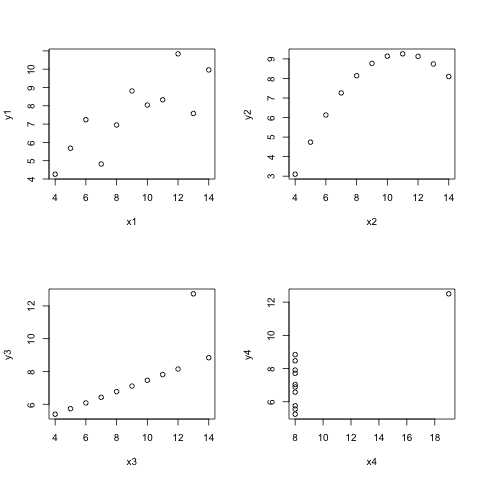

In [54]:
par(mfrow=c(2,2))
with(anscombe, plot(x1, y1, type="p"))
with(anscombe, plot(x2, y2, type="p"))
with(anscombe, plot(x3, y3, type="p"))
with(anscombe, plot(x4, y4, type="p"))  

(13) Write a function that takes two p-dimensional vectors and retunrs the Euclidean distance between them. The definitiion for Euclidean distance in p dimensions extneds the 2-dimensional definition in the obvious way. For example, the distance between the 3-dimensonal vectors $(1,2,3)$ and $(2,4,6)$ is $\sqrt{((1-2)^2 + (2-4)^2 + (3-6)^2)}$.

In [59]:
my.dist <- function(v1, v2) {
    return(sqrt(sum((v1-v2)^2)))
}

my.dist(c(0,0), c(3,4))

[1] 5

(14) Write a function to calculate the median of a vector of numbers. Recall that if the vector is of odd length, the median is the central number of the sorted vacotr; othersise it is the average of the two central numbers.

In [78]:
my.median <- function(v) {
    v <- sort(v)
    n <- length(v)
    if (n %% 2 == 1) 
        ans <- v[floor(n/2)]
    else {
        low <- floor(n/2)
        ans <- mean(v[low:(low+1)])
    }
    return(ans)
}




In [80]:
my.median(1:11)

[1] 5

In [81]:
my.median(1:12)

[1] 6.5

(15) Write a function called `peek` that will take a dataframe and a number as arguments - so you would eovke the function with a call like `peek(df, n)`. What this function does is return $n$ rows at random (no duplicate rows). If $n$ is greater than the number of rows, the enitre data frame is returned.

In [84]:
peek <- function(df, n) {
    if (n > length(df)) {
        ans <- df
    }
    else {
        idx <- sample(1:length(df), n, replace=FALSE)
        ans <- df[idx,]
    }
    return(ans)
}




In [85]:
peek(anscombe, 3)

  x1 x2 x3 x4   y1   y2    y3   y4
4  9  9  9  8 8.81 8.77  7.11 8.84
3 13 13 13  8 7.58 8.74 12.74 7.71
5 11 11 11  8 8.33 9.26  7.81 8.47